### Required Discussion 16.1: Comparing Models

Now that you have seen a variety of models for regression and classification problems, it is good to step back and weigh the pros and cons of these options.  In the case of classification models, there are at least three things to consider:

1. Is the model good at handling imbalanced classes?
2. Does the model train quickly?
3. Does the model yield interpretable results?

Depending on your dataset and goals, the importance of these considerations will vary from project to project.  Your goal is to review our models to this point and discuss the pros and cons of each.  Two example datasets are offered as a way to offer two very different tasks where interpretability of the model may be of differing importance.

### Data and Task

Your goal is to discuss the pros and cons of Logistic Regression, Decision Trees, KNN, and SVM for the tasks below.  Consider at least the three questions above and list any additional considerations you believe are important to determining the "best" model for the task.  Share your response with your peers on the class discussion board.  

**TASK 1**: Predicting Customer Churn

Suppose you are tasked with producing a model to predict customer churn.  Which of your classification models would you use and what are the pros and cons of this model for this task?  Be sure to consider interpretability, imbalnced classes, and the speed of training.



### Summary of phone churn analyis
    I would like to use DecisionTreeClassifier in combination of GridSearch for this customer churn prediction :
        - which produces highest test score 0.937650
        - The f1-score 0.96 and recall score 0.99, precision 0.94 are best and well balanced overall. The DecisionTreeClassifier 0.95 for precision/recall/f1-score is itself impressive.
        - This DecisionTreeClassifier with gridsearch to handle unblanced training and test data well.

### Test and analysis
- Test result with different models:
                               model     score
0                 LogisticRegression  0.859712
1             DecisionTreeClassifier  0.912470
2               KNeighborsClassifier  0.858513
3                         SVC linear  0.850120
4                           SVC poly  0.850120
5                            SVC rbf  0.850120
6                        SVC sigmoid  0.850120
7  GridSearch DecisionTreeClassifier  0.937650

- F1-score/recall/precision for grid seach of DecisionTreeClassifier
                   precision    recall  f1-score   support

       Churn       0.94      0.99      0.96       709
   Not Churn       0.90      0.66      0.76       125

- F1-score/recall/precision for DecisionTreeClassifier with default parameters:
                    precision    recall  f1-score   support
       Churn       0.95      0.95      0.95       709
   Not Churn       0.70      0.72      0.71       125


### Analysis of the test result
    - DecisionTreeClassifier seems to produce the best test score of 0.912470
    - GridSearchCV with DecisionTreeClassifier improves the test score even further to 0.937650
        - The f1-score for customer churn is 0.96 and recall is 0.99
        - This seems to handle unblanced training and test data well.


In [157]:
import pandas as pd
import matplotlib.pyplot as plt

In [158]:
from sklearn.datasets import load_digits

The data is loaded below.  Note that the handwritten digit data is already split into features and target (`digits`, `labels`). 

In [159]:
churn = pd.read_csv('data/telecom_churn.csv')
digits, labels = load_digits(return_X_y=True)

In [160]:
#churn data
churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Logistic regression

#data 
- not balanced. churn vs not churn ratio is 1 to 5.9

In [161]:

### check if the data is balanced
label_counts = churn['Churn'].value_counts()
print(label_counts)

Churn
False    2850
True      483
Name: count, dtype: int64


In [162]:
X = churn.copy()
X = X.drop(columns=['Churn'])
y=churn['Churn'] 



In [163]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [164]:
onehot_encoder = OneHotEncoder(drop = 'if_binary', handle_unknown='ignore')
ohe_transformer = make_column_transformer((onehot_encoder, ['State','International plan',	'Voice mail plan']), remainder='passthrough')



In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [166]:
df_churn_score =pd.DataFrame(columns=['model','score'])

### LogisticRegression

In [167]:


pipe_lr = Pipeline([
    ('transformer', ohe_transformer),  # Standardize the data   
    ('scaler',StandardScaler(with_mean=False)),
    ('lr', LogisticRegression(max_iter=1000))  # Train Logistic Regression model
])


pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Churn', 'Not Churn']))

lr_score= pipe_lr.score(X_test, y_test)
print(lr_score)
df_churn_score.loc[len(df_churn_score)] = {'model':'LogisticRegression', 'score':lr_score}



              precision    recall  f1-score   support

       Churn       0.88      0.97      0.92       709
   Not Churn       0.58      0.24      0.34       125

    accuracy                           0.86       834
   macro avg       0.73      0.60      0.63       834
weighted avg       0.83      0.86      0.83       834

0.8597122302158273


### decision trees classifier

In [168]:

df= churn.copy()

df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['State'] = pd.Categorical(df['State'] ).codes

#print(df.head())
y=df['Churn']
X=df.drop(columns=['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
dt = DecisionTreeClassifier().fit(X_train, y_train)
#dt_score =dt.score(X_test, y_test)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Churn', 'Not Churn']))
dt_score= dt.score(X_test, y_test)
print(dt_score)
df_churn_score.loc[len(df_churn_score)] = {'model':'DecisionTreeClassifier', 'score':dt_score}


              precision    recall  f1-score   support

       Churn       0.95      0.93      0.94       709
   Not Churn       0.66      0.74      0.70       125

    accuracy                           0.91       834
   macro avg       0.81      0.84      0.82       834
weighted avg       0.91      0.91      0.91       834

0.9052757793764988


### KNN

In [169]:

from sklearn.neighbors import KNeighborsClassifier
knn  = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Churn', 'Not Churn']))
knn_score= knn.score(X_test, y_test)
print(dt_score)
df_churn_score.loc[len(df_churn_score)] = {'model':'KNeighborsClassifier', 'score':knn_score}

              precision    recall  f1-score   support

       Churn       0.88      0.96      0.92       709
   Not Churn       0.56      0.28      0.37       125

    accuracy                           0.86       834
   macro avg       0.72      0.62      0.65       834
weighted avg       0.83      0.86      0.84       834

0.9052757793764988


### SVM

In [170]:

svc_linear= SVC(kernel='linear', random_state=42).fit(X_train, y_train)
y_pred = svc_linear.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Churn', 'Not Churn'],zero_division=0))
svc_linear_score= svc_linear.score(X_test, y_test)
print(svc_linear_score)
df_churn_score.loc[len(df_churn_score)] = {'model':'SVC linear', 'score':svc_linear_score}

              precision    recall  f1-score   support

       Churn       0.85      1.00      0.92       709
   Not Churn       0.00      0.00      0.00       125

    accuracy                           0.85       834
   macro avg       0.43      0.50      0.46       834
weighted avg       0.72      0.85      0.78       834

0.8501199040767387


In [171]:

svc_poly= SVC(kernel='poly', random_state=42).fit(X_train, y_train)
y_pred = svc_poly.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Churn', 'Not Churn'],zero_division=0))

svc_poly_score= svc_poly.score(X_test, y_test)
print(svc_poly_score)
df_churn_score.loc[len(df_churn_score)] = {'model':'SVC poly', 'score':svc_poly_score}

              precision    recall  f1-score   support

       Churn       0.85      1.00      0.92       709
   Not Churn       0.00      0.00      0.00       125

    accuracy                           0.85       834
   macro avg       0.43      0.50      0.46       834
weighted avg       0.72      0.85      0.78       834

0.8501199040767387


In [172]:
svc_rbf= SVC(kernel='rbf', random_state=42).fit(X_train, y_train)
y_pred = svc_rbf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Churn', 'Not Churn'],zero_division=0))

svc_rbf_score= svc_rbf.score(X_test, y_test)
print(svc_rbf_score)
df_churn_score.loc[len(df_churn_score)] = {'model':'SVC rbf', 'score':svc_rbf_score}


              precision    recall  f1-score   support

       Churn       0.85      1.00      0.92       709
   Not Churn       0.00      0.00      0.00       125

    accuracy                           0.85       834
   macro avg       0.43      0.50      0.46       834
weighted avg       0.72      0.85      0.78       834

0.8501199040767387


In [173]:
svc_sigmoid= SVC(kernel='sigmoid', random_state=42).fit(X_train, y_train)
y_pred = svc_sigmoid.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Churn', 'Not Churn'],zero_division=0))

svc_sigmoid_score= svc_sigmoid.score(X_test, y_test)
print(svc_sigmoid_score)
df_churn_score.loc[len(df_churn_score)] = {'model':'SVC sigmoid', 'score':svc_sigmoid_score}


              precision    recall  f1-score   support

       Churn       0.85      1.00      0.92       709
   Not Churn       0.00      0.00      0.00       125

    accuracy                           0.85       834
   macro avg       0.43      0.50      0.46       834
weighted avg       0.72      0.85      0.78       834

0.8501199040767387


### GridSearch 

In [174]:
### GridSearch

In [175]:

param_grid = {
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_dt= GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid)
grid_dt.fit(X_train, y_train)
grid_dt_score = grid_dt.score(X_test, y_test)
df_churn_score.loc[len(df_churn_score)] = {'model':'GridSearch DecisionTreeClassifier', 'score':grid_dt_score}

y_pred = grid_dt.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Churn', 'Not Churn'],zero_division=0))


              precision    recall  f1-score   support

       Churn       0.94      0.99      0.96       709
   Not Churn       0.90      0.66      0.76       125

    accuracy                           0.94       834
   macro avg       0.92      0.82      0.86       834
weighted avg       0.94      0.94      0.93       834



### Test result for phone churn

In [176]:
print(df_churn_score)

                               model     score
0                 LogisticRegression  0.859712
1             DecisionTreeClassifier  0.905276
2               KNeighborsClassifier  0.858513
3                         SVC linear  0.850120
4                           SVC poly  0.850120
5                            SVC rbf  0.850120
6                        SVC sigmoid  0.850120
7  GridSearch DecisionTreeClassifier  0.937650


**TASK 2**: Recognizing Handwritten Digits

Suppose you are tasked with training a model to recognize handwritten digits.  Which of your classifier would you use here and why?  Again, be sure to consider the balance of classes, speed of training, and importance of interpretability.



### Summary of  handwritten digits recognition:
- Conclusion
    SVC poly model will be used since it produces the best test score and the speed seems to be fast as well. The dataset seems to be balanced between different labels. 
    

- Test score summary between different models tested in this section.
0      LogisticRegression  0.971111
1  DecisionTreeClassifier  0.868889
2    KNeighborsClassifier  0.986667
3              SVC linear  0.982222
4                SVC poly  0.993333
5                 SVC rbf  0.986667
6             SVC sigmoid  0.911111
7     GridSearch SVC poly  0.993333

- Analysis
    Data is balanced between different lables.
    SVC poly produces the best test score for this test set. The speed seems to be fast as well.
    Grid search with different degrees in SVC with 'poly' kernel did not improve the test score.



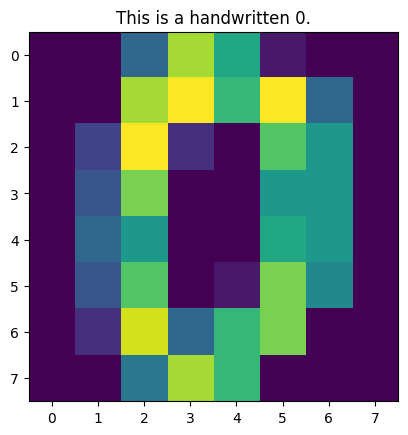

In [177]:
#example image
plt.imshow(digits[0].reshape(8, 8))
plt.title('This is a handwritten 0.');

### 

In [178]:
### check if the data is balanced
label_counts = pd.DataFrame({'laabels':labels}).value_counts()
print(label_counts)

laabels
3          183
1          182
5          182
4          181
6          181
9          180
7          179
0          178
2          177
8          174
Name: count, dtype: int64


In [179]:
X_train, X_test, y_train, y_test = train_test_split(digits, labels, random_state = 42)

In [180]:
df_digit_score =pd.DataFrame(columns=['model','score'])

### LogisticRegression

In [181]:
pipe_lr = Pipeline([
    ('scaler',StandardScaler(with_mean=False)),
    ('lr', LogisticRegression(max_iter=1000))  # Train Logistic Regression model
])


pipe_lr.fit(X_train, y_train)
lg_score= pipe_lr.score(X_test, y_test)
print(lg_score)
df_digit_score.loc[len(df_digit_score)] = {'model':'LogisticRegression', 'score':lg_score}
#print(df_digit_score)



0.9711111111111111


###  Decision tree

In [182]:

dt = DecisionTreeClassifier().fit(X_train, y_train)
dt_score= dt.score(X_test, y_test)
print(dt_score)
df_digit_score.loc[len(df_digit_score)] = {'model':'DecisionTreeClassifier', 'score':dt_score}


0.8733333333333333


### KNN

In [183]:
from sklearn.neighbors import KNeighborsClassifier
knn  = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn_score= knn.score(X_test, y_test)
print(knn_score)

df_digit_score.loc[len(df_digit_score)] = {'model':'KNeighborsClassifier', 'score':knn_score}

0.9866666666666667


### SVC linear

In [184]:
svc_linear= SVC(kernel='linear', random_state=42).fit(X_train, y_train)
svc_linear_score= svc_linear.score(X_test, y_test)
print(svc_linear_score)
df_digit_score.loc[len(df_digit_score)] = {'model':'SVC linear', 'score':svc_linear_score}

0.9822222222222222


In [185]:
svc_poly= SVC(kernel='poly', random_state=42).fit(X_train, y_train)
svc_poly_score= svc_poly.score(X_test, y_test)
print(svc_poly_score)
df_digit_score.loc[len(df_digit_score)] = {'model':'SVC poly', 'score':svc_poly_score}

0.9933333333333333


In [186]:
svc_rbf= SVC(kernel='rbf', random_state=42).fit(X_train, y_train)
svc_rbf_score= svc_rbf.score(X_test, y_test)
print(svc_rbf_score)
df_digit_score.loc[len(df_digit_score)] = {'model':'SVC rbf', 'score':svc_rbf_score}

0.9866666666666667


In [187]:
svc_sigmoid= SVC(kernel='sigmoid', random_state=42).fit(X_train, y_train)
svc_sigmoid_score= svc_sigmoid.score(X_test, y_test)
print(svc_sigmoid_score)
df_digit_score.loc[len(df_digit_score)] = {'model':'SVC sigmoid', 'score':svc_sigmoid_score}

0.9111111111111111


### Grid search for SVC with kernel poly with different powers

In [188]:
grid_svc_poly= GridSearchCV(estimator=SVC(kernel='poly', random_state=42), param_grid={'degree':range(3,20)})
grid_svc_poly.fit(X_train, y_train)
grid_svc_poly_score = grid_svc_poly.score(X_test, y_test)
df_digit_score.loc[len(df_digit_score)] = {'model':'GridSearch SVC poly', 'score':grid_svc_poly_score}


### Test result for digital recognition

In [189]:
print(df_digit_score)

                    model     score
0      LogisticRegression  0.971111
1  DecisionTreeClassifier  0.873333
2    KNeighborsClassifier  0.986667
3              SVC linear  0.982222
4                SVC poly  0.993333
5                 SVC rbf  0.986667
6             SVC sigmoid  0.911111
7     GridSearch SVC poly  0.993333


In [190]:


#print(classification_report(y_test, grid_predictions))
